#### MNIST training with diffrent hidden layer size

In this exercise we will see how the hidden layer size affects on the test accuracy and test loss of a MNIST  Deep Neural Network classifier.

Use matplotlib to plot the test accuracy vs sizes and test loss vs sizes

You should be able to complete this using the MNIST classifier we built in the last meeting.

In [8]:
# import functions
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Reshape
from keras.models import Model
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

In [9]:
# write a function to construct model with hidden layer defined by the size function
def make_model(size):
    model = Sequential()
    model.add(Reshape((784,), input_shape=(28,28)))
    #Add code here
    
    for i in range(1, size + 1):
        model.add(Dense(256, activation = 'relu')) # Hidden layer (for classification, usually use relu)
        
    model.add(Dense(10, activation = 'softmax')) # Output layer (for classification, usually use softmax)
    
    return model

In [10]:
sizes = [1] # create a list of sizes you want to experiment with
test_loss = [] # create array to store  test loss 
test_accuracy = [] # create array to store test accuracy

In [11]:
# load MNIST data
# convert the range of values of train and test images from 0 to 255 to 0 to 1
# use to_categorical to convert integer labels to logits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale pixel values (0 to 255) to (0 to 1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# Convert integer labels to logits or one hot bit
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
for size in sizes:
    my_model = make_model(size)
    my_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = my_model.fit(x_train, y_train, epochs = 1, shuffle = 'batch', batch_size = 64)
    t_loss, t_accuracy = my_model.evaluate(x_test, y_test)
    test_loss.append(t_loss)
    test_accuracy.append(t_accuracy)
    # compile model  with optimizer='sgd' loss='categorical_crossentropy'  metrics=['accuracy'])
    # fit model with  epochs=10, batch_size=64
    # evaluate model to get test loss and test accuracy
    # append the test loss and test accuracy to the arrays we created earlier

Epoch 1/1
10000/10000 [==============================] - 1s 60us/step


C:\Users\ktnng\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


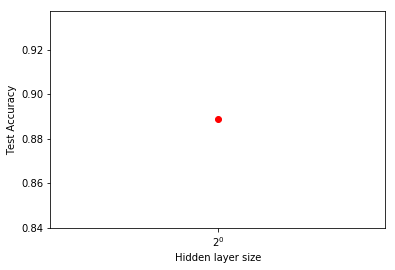

In [13]:
plt.figure()
plt.xscale('log', basex=2)
plt.ylabel('Test Accuracy')
plt.xlabel('Hidden layer size')
plt.plot(sizes, test_accuracy, 'ro')

C:\Users\ktnng\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


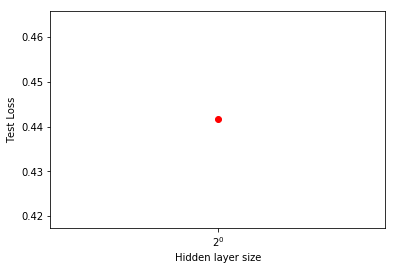

In [14]:
plt.figure()
plt.xscale('log', basex=2)
plt.ylabel('Test Loss')
plt.xlabel('Hidden layer size')
plt.plot(sizes, test_loss, 'ro')